Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values count AFTER converting 0->NaN (so imputers can work):
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction 

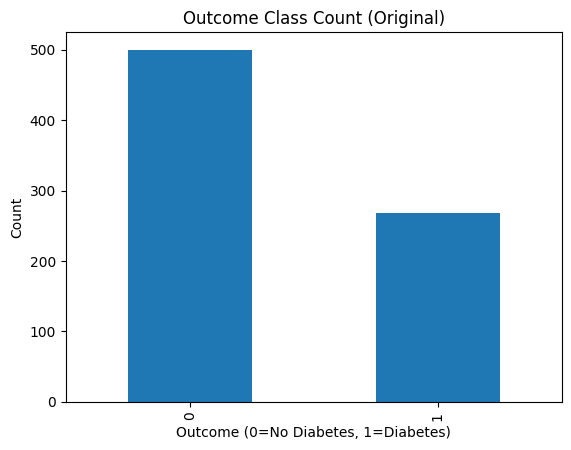

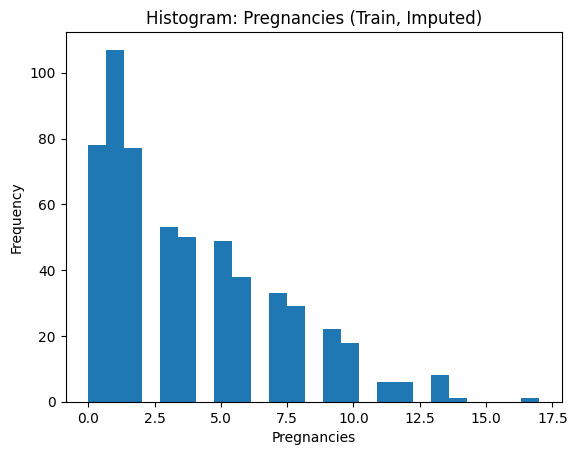

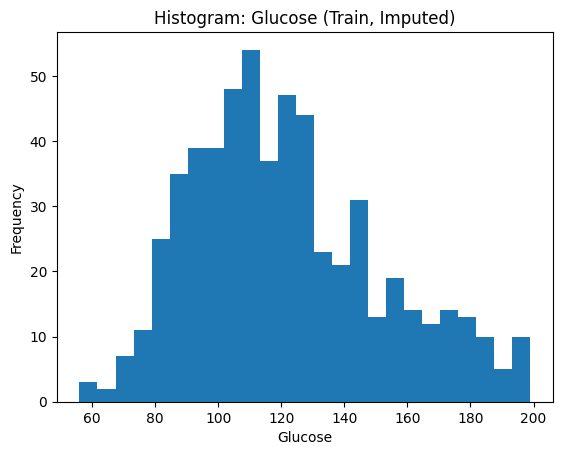

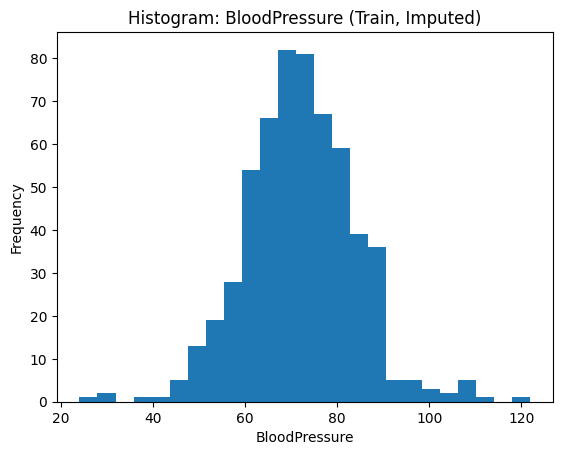

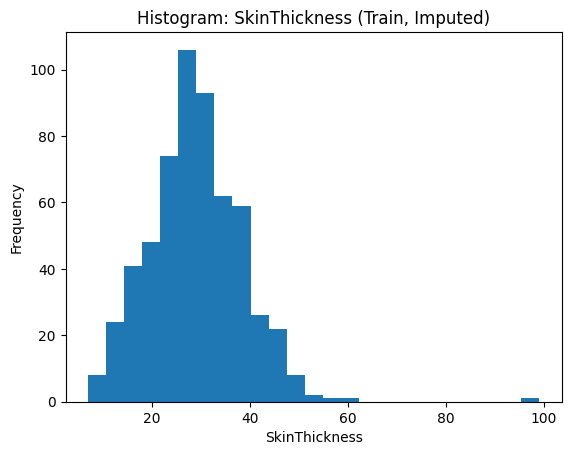

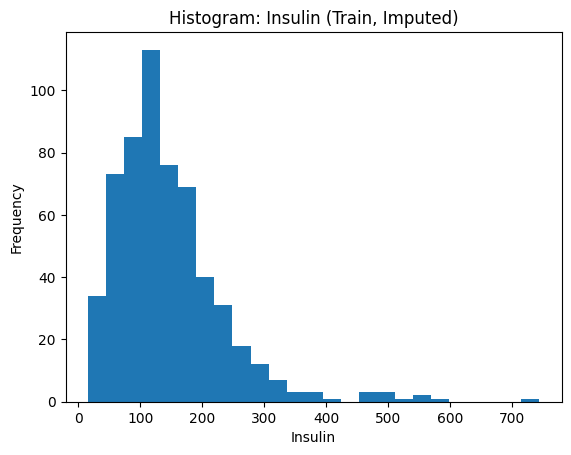

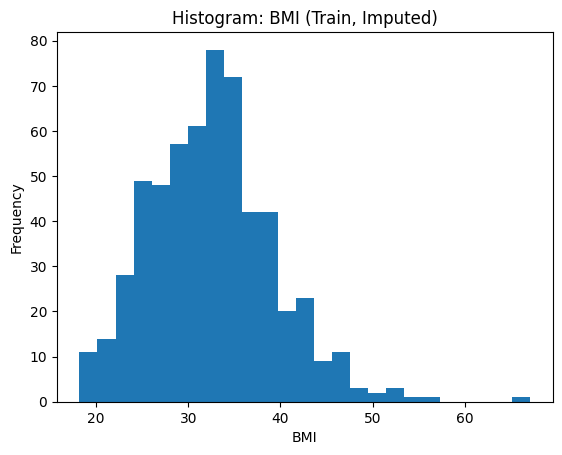

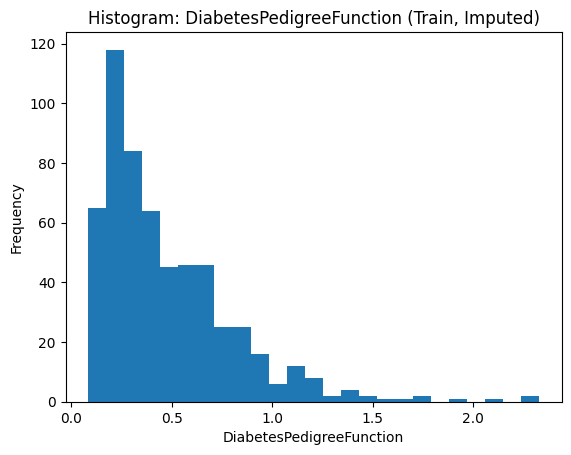

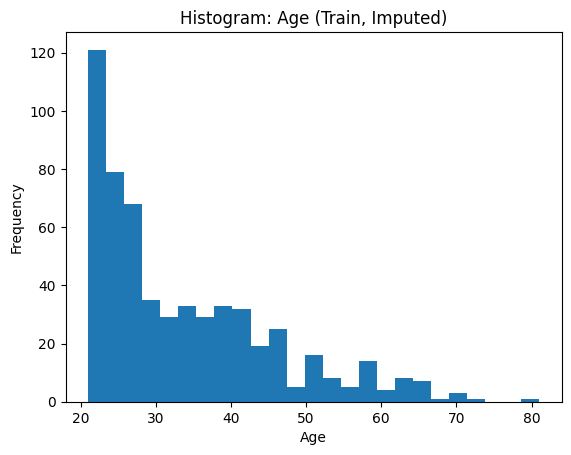

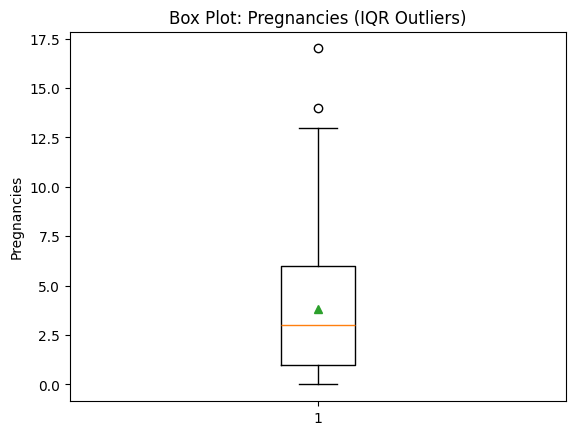

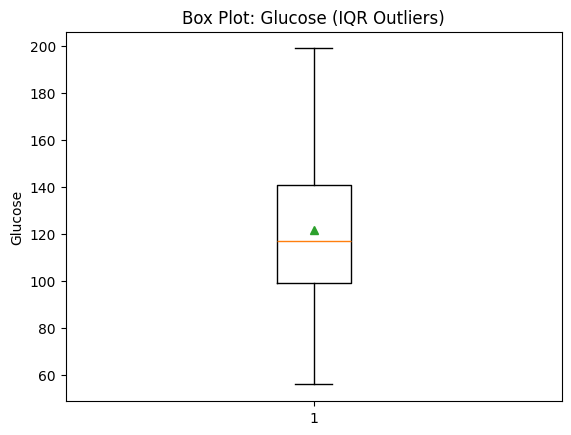

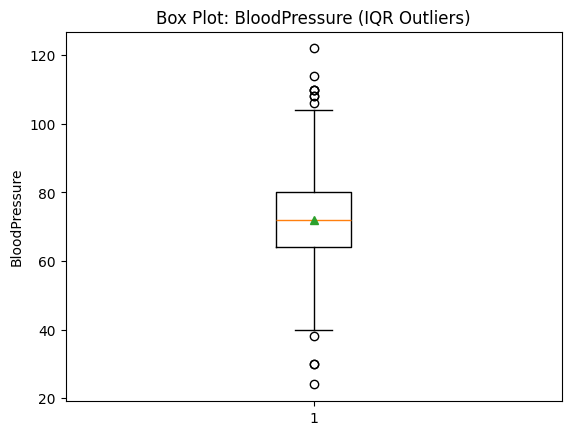

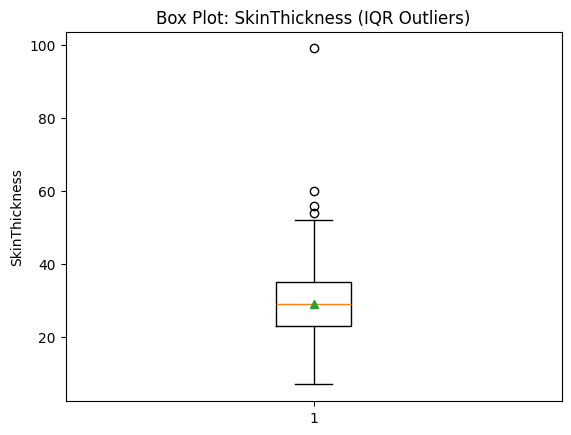

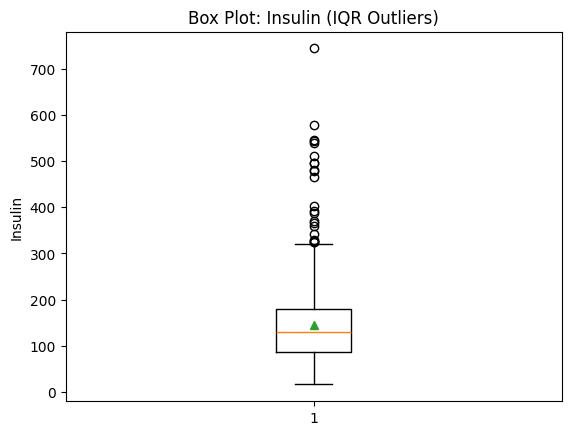

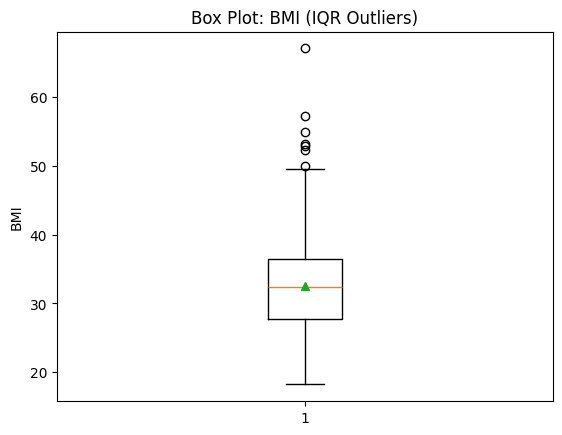

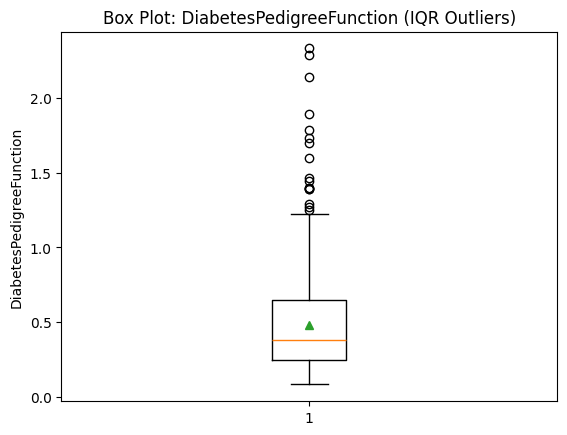

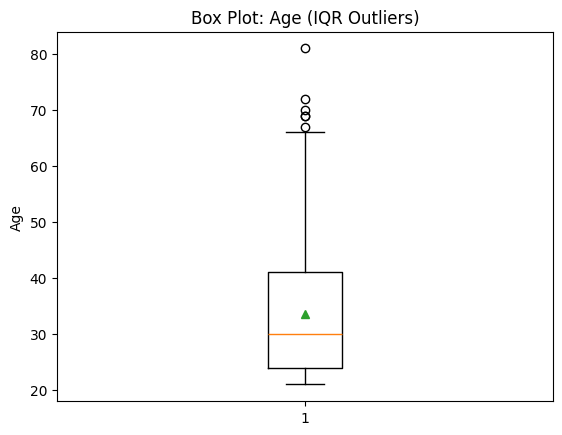


=== IQR / Outlier Summary (Train) ===
                    Feature         Q1      Median          Q3        IQR  \
4                   Insulin  85.874438  128.939925  180.000895  94.126457   
6  DiabetesPedigreeFunction   0.245750    0.384000    0.646250   0.400500   
2             BloodPressure  64.000000   72.000000   80.000000  16.000000   
5                       BMI  27.800000   32.400000   36.525000   8.725000   
7                       Age  24.000000   30.000000   41.000000  17.000000   
3             SkinThickness  23.000000   29.000000   35.000000  12.000000   
0               Pregnancies   1.000000    3.000000    6.000000   5.000000   
1                   Glucose  99.000000  117.000000  141.000000  42.000000   

   LowerBound  UpperBound  OutlierCount  
4  -55.315247   321.19058            22  
6   -0.355000     1.24700            17  
2   40.000000   104.00000            12  
5   14.712500    49.61250             7  
7   -1.500000    66.50000             6  
3    5.000000  

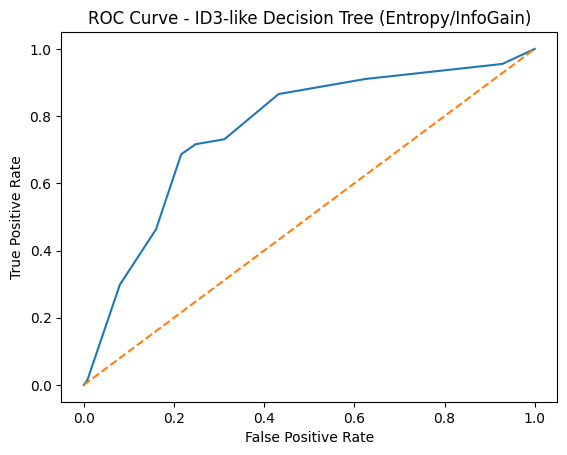


--- Decision Tree Rules (export_text) ---

|--- Glucose <= 4.53
|   |--- Insulin <= 7.18
|   |   |--- DiabetesPedigreeFunction <= 0.33
|   |   |   |--- BMI <= 4.11
|   |   |   |   |--- class: 0
|   |   |   |--- BMI >  4.11
|   |   |   |   |--- class: 0
|   |   |--- DiabetesPedigreeFunction >  0.33
|   |   |   |--- BMI <= 4.01
|   |   |   |   |--- class: 0
|   |   |   |--- BMI >  4.01
|   |   |   |   |--- class: 0
|   |--- Insulin >  7.18
|   |   |--- BMI <= 3.98
|   |   |   |--- class: 0
|   |   |--- BMI >  3.98
|   |   |   |--- Age <= 0.91
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  0.91
|   |   |   |   |--- class: 1
|--- Glucose >  4.53
|   |--- Glucose <= 4.66
|   |   |--- BMI <= 4.13
|   |   |   |--- Age <= 0.92
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  0.92
|   |   |   |   |--- class: 0
|   |   |--- BMI >  4.13
|   |   |   |--- BMI <= 4.72
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  4.72
|   |   |   |   |--- class: 1
|   |--- Glucose >  4.66
|   | 

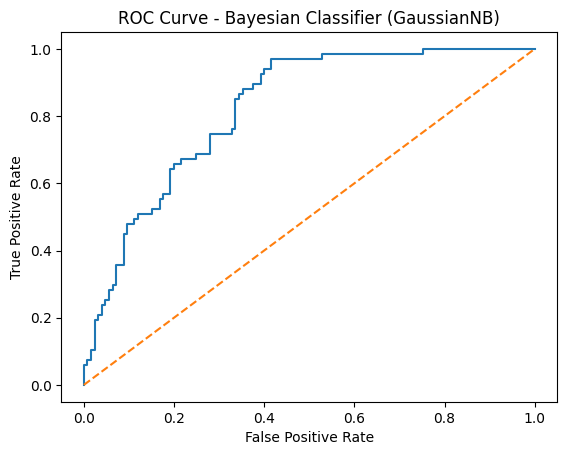


Best MLP params: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (32,), 'mlp__learning_rate_init': 0.0005}

=== MLP Backprop NN (Tuned) ===
Confusion Matrix:
 [[102  23]
 [ 29  38]]
TN: 102
FP: 23
FN: 29
TP: 38
Accuracy: 0.7292
Precision: 0.6230
Recall/Sensitivity: 0.5672
Specificity: 0.8160
F1: 0.5937
ROC_AUC: 0.8210


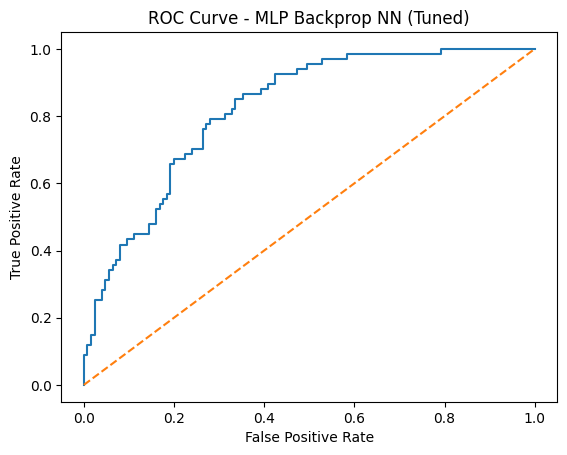


MLP Train Acc: 0.8142 | Test Acc: 0.7292
Bias/Variance Diagnosis: High Variance (overfitting)

=== Multivariate Linear Regression (Predict Glucose) ===
RMSE: 1.1965
R2  : -27.7561

=== Silhouette Scores (Train, Unsupervised) ===
KMeans(k=2): Silhouette Score = 0.2008
SOM(grid labels): Silhouette Score = 0.0987
DBSCAN: Silhouette not valid (only 1 cluster).
MeanShift: Silhouette Score = 0.1856

DONE ✅  Modules 1–8 executed.


In [5]:
# ============================================================
# CAPSTONE PROJECT 2: PIMA INDIANS DIABETES DATASET (Modules 1–8)
# Single end-to-end script (run top-to-bottom in Colab/Jupyter)
# ============================================================

# -------------------------
# 0) Install (if needed)
# -------------------------
# In Colab, uncomment:
!pip -q install scikit-learn imbalanced-learn minisom

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, silhouette_score
)

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# SOM
from minisom import MiniSom

# For skewness
from scipy.stats import skew

# -------------------------
# 1) Load dataset (REAL)
# -------------------------
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df = pd.read_csv(url, header=None, names=cols)

print("Shape:", df.shape)
print(df.head())

# ----------------------------------------------------------
# Module 1: Data Cleaning + Ensure missing values exist
# ----------------------------------------------------------
# In this dataset, 0 is clinically impossible for some medical measures -> treat 0 as missing
missing_like_zero_cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df_missing = df.copy()
df_missing[missing_like_zero_cols] = df_missing[missing_like_zero_cols].replace(0, np.nan)

print("\nMissing values count AFTER converting 0->NaN (so imputers can work):")
print(df_missing.isna().sum())

X = df_missing.drop(columns=["Outcome"])
y = df_missing["Outcome"].astype(int)

num_cols = X.columns.tolist()

# Split once (keep same split for fair comparisons)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

def evaluate_missingness(name, Xtr):
    print(f"\n[{name}] Missing in train:")
    print(pd.DataFrame(Xtr).isna().sum())

# --- 1A) SimpleImputer (median)
simple_imputer = SimpleImputer(strategy="median")
Xtr_simple = pd.DataFrame(simple_imputer.fit_transform(X_train), columns=num_cols, index=X_train.index)
Xte_simple = pd.DataFrame(simple_imputer.transform(X_test), columns=num_cols, index=X_test.index)
evaluate_missingness("SimpleImputer", Xtr_simple)

# --- 1B) KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights="distance")
Xtr_knn = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=num_cols, index=X_train.index)
Xte_knn = pd.DataFrame(knn_imputer.transform(X_test), columns=num_cols, index=X_test.index)
evaluate_missingness("KNNImputer", Xtr_knn)

# --- 1C) IterativeImputer (MICE-like)
iter_imputer = IterativeImputer(random_state=42, max_iter=20)
Xtr_iter = pd.DataFrame(iter_imputer.fit_transform(X_train), columns=num_cols, index=X_train.index)
Xte_iter = pd.DataFrame(iter_imputer.transform(X_test), columns=num_cols, index=X_test.index)
evaluate_missingness("IterativeImputer", Xtr_iter)

# Choose ONE imputed dataset for the rest of modules (change here if you want):
Xtr = Xtr_iter.copy()
Xte = Xte_iter.copy()

# ----------------------------------------------------------
# Module 2: Symmetry check (Mean, Median, Skewness)
# ----------------------------------------------------------
def classify_skew(sk):
    # common practical thresholds:
    # ~0 symmetric; >0 right-skewed; <0 left-skewed
    if abs(sk) < 0.5:
        return "Symmetric"
    elif sk >= 0.5:
        return "Right-Skewed"
    else:
        return "Left-Skewed"

sym_rows = []
for c in num_cols:
    mean_v = Xtr[c].mean()
    med_v  = Xtr[c].median()
    sk     = skew(Xtr[c], bias=False)
    sym_rows.append([c, mean_v, med_v, sk, classify_skew(sk)])

symmetry_df = pd.DataFrame(sym_rows, columns=["Feature","Mean","Median","Skewness","Class"])
print("\n=== Symmetry Report (Train) ===")
print(symmetry_df.sort_values("Skewness"))

# ----------------------------------------------------------
# Module 3: Preprocessing + Transformations to fix skewness
# ----------------------------------------------------------
# Scalers (demonstration)
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler()
}

print("\n=== Scaler Demo: show mean/std for a couple columns after scaling ===")
for sname, scaler in scalers.items():
    X_scaled = pd.DataFrame(scaler.fit_transform(Xtr), columns=num_cols, index=Xtr.index)
    print(f"\n{sname}:")
    print(X_scaled[["Glucose","Insulin","BMI"]].agg(["mean","std"]).round(3))

# Transformations to reduce skew:
# - log1p and sqrt require non-negative; we will use safe versions
# - Box-Cox requires strictly positive -> use Yeo-Johnson (works with >=0 too)
def safe_log1p(col):
    # ensure non-negative
    return np.log1p(np.clip(col, a_min=0, a_max=None))

def safe_sqrt(col):
    return np.sqrt(np.clip(col, a_min=0, a_max=None))

# Identify skewed features (|skew| >= 0.5)
skewed_features = symmetry_df.loc[symmetry_df["Skewness"].abs() >= 0.5, "Feature"].tolist()
print("\nSkewed features (|skew|>=0.5):", skewed_features)

# Apply Yeo-Johnson for skewed features (recommended generic choice)
pt = PowerTransformer(method="yeo-johnson", standardize=False)

Xtr_tf = Xtr.copy()
Xte_tf = Xte.copy()

if len(skewed_features) > 0:
    Xtr_tf[skewed_features] = pt.fit_transform(Xtr[skewed_features])
    Xte_tf[skewed_features] = pt.transform(Xte[skewed_features])

# Recompute skewness after transformation
after_rows = []
for c in num_cols:
    sk_before = float(symmetry_df.loc[symmetry_df["Feature"] == c, "Skewness"].values[0])
    sk_after  = float(skew(Xtr_tf[c], bias=False))
    after_rows.append([c, sk_before, sk_after])

sk_fix_df = pd.DataFrame(after_rows, columns=["Feature","Skew_Before","Skew_After"]).sort_values("Skew_Before")
print("\n=== Skewness Before vs After (Yeo-Johnson applied to skewed features) ===")
print(sk_fix_df)

# For modeling, we'll use:
# - tree models can use unscaled (but we can still use transformed)
# - distance / NN benefit from scaling
# We'll build pipelines per model later.

# ----------------------------------------------------------
# Module 4: Univariate Visualization (Bar, Histogram, Box with IQR)
# ----------------------------------------------------------
# Bar plot for class distribution
plt.figure()
df["Outcome"].value_counts().sort_index().plot(kind="bar")
plt.title("Outcome Class Count (Original)")
plt.xlabel("Outcome (0=No Diabetes, 1=Diabetes)")
plt.ylabel("Count")
plt.show()

# Histograms for each feature (train, after impute)
for c in num_cols:
    plt.figure()
    plt.hist(Xtr[c], bins=25)
    plt.title(f"Histogram: {c} (Train, Imputed)")
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.show()

# Box plot + IQR outliers per feature (train)
def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    outliers = series[(series < low) | (series > high)]
    return q1, series.median(), q3, iqr, low, high, outliers

out_summary = []
for c in num_cols:
    q1, med, q3, iqr, low, high, outs = iqr_outliers(Xtr[c])
    out_summary.append([c, q1, med, q3, iqr, low, high, len(outs)])

    plt.figure()
    plt.boxplot(Xtr[c], vert=True, showmeans=True)
    plt.title(f"Box Plot: {c} (IQR Outliers)")
    plt.ylabel(c)
    plt.show()

out_df = pd.DataFrame(out_summary, columns=["Feature","Q1","Median","Q3","IQR","LowerBound","UpperBound","OutlierCount"])
print("\n=== IQR / Outlier Summary (Train) ===")
print(out_df.sort_values("OutlierCount", ascending=False))

# ----------------------------------------------------------
# Module 5: Balancing (Under, Over, SMOTE) + Entropy analysis
# ----------------------------------------------------------
def entropy_of_labels(labels):
    # Shannon entropy in bits
    counts = np.bincount(labels.astype(int))
    probs = counts[counts > 0] / counts.sum()
    return float(-(probs * np.log2(probs)).sum())

H_imbal = entropy_of_labels(y_train.values)
H_pure0 = entropy_of_labels(np.zeros_like(y_train.values))
H_pure1 = entropy_of_labels(np.ones_like(y_train.values))
print("\nEntropy (Imbalanced Train):", round(H_imbal, 4))
print("Entropy (Pure all-0):", round(H_pure0, 4), " | (Pure all-1):", round(H_pure1, 4))

# Use a scaled feature space for resampling models that need scaling later
Xtr_base = Xtr_tf.copy()  # transformed version
ytr_base = y_train.copy()

rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42, k_neighbors=5)

X_rus, y_rus = rus.fit_resample(Xtr_base, ytr_base)
X_ros, y_ros = ros.fit_resample(Xtr_base, ytr_base)
X_smt, y_smt = smote.fit_resample(Xtr_base, ytr_base)

print("\nClass counts:")
print("Imbalanced:", np.bincount(ytr_base))
print("UnderSample:", np.bincount(y_rus))
print("OverSample :", np.bincount(y_ros))
print("SMOTE      :", np.bincount(y_smt))

print("\nEntropy:")
print("Imbalanced:", round(entropy_of_labels(ytr_base.values), 4))
print("UnderSample:", round(entropy_of_labels(y_rus.values), 4))
print("OverSample :", round(entropy_of_labels(y_ros.values), 4))
print("SMOTE      :", round(entropy_of_labels(y_smt.values), 4))

# Bias/Variance quick diagnostic using train vs test accuracy:
# - High Bias: train low, test low
# - High Variance: train high, test low
def bias_variance_label(train_acc, test_acc, gap_threshold=0.08, low_threshold=0.70):
    gap = train_acc - test_acc
    if train_acc < low_threshold and test_acc < low_threshold:
        return "High Bias (underfitting)"
    if gap > gap_threshold and train_acc >= low_threshold:
        return "High Variance (overfitting)"
    if train_acc >= low_threshold and test_acc >= low_threshold and gap <= gap_threshold:
        return "Low Bias & Low Variance (good generalization)"
    return "Mixed/Needs tuning"

# ----------------------------------------------------------
# Module 6: Supervised Models
#   a) ID3-like Decision Tree (Entropy / Information Gain) + Rules
#   b) Bayesian Classifier
#   c) MLP Backprop NN (hyper-tuning)
#   d) Multivariate Linear Regression (prediction)
# ----------------------------------------------------------
# Helper: metrics from confusion matrix
def classification_report_from_cm(y_true, y_pred, y_prob=None, title=""):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy  = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall    = tp / (tp + fn) if (tp + fn) else 0.0   # Sensitivity
    specificity = tn / (tn + fp) if (tn + fp) else 0.0
    f1 = (2*precision*recall)/(precision+recall) if (precision+recall) else 0.0

    out = {
        "TN": tn, "FP": fp, "FN": fn, "TP": tp,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall/Sensitivity": recall,
        "Specificity": specificity,
        "F1": f1
    }

    if y_prob is not None:
        out["ROC_AUC"] = roc_auc_score(y_true, y_prob)

    print(f"\n=== {title} ===")
    print("Confusion Matrix:\n", cm)
    for k, v in out.items():
        if k in ["TN","FP","FN","TP"]:
            print(f"{k}: {v}")
        else:
            print(f"{k}: {v:.4f}")

    # ROC curve (only if probability provided)
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        plt.figure()
        plt.plot(fpr, tpr)
        plt.plot([0,1],[0,1], linestyle="--")
        plt.title(f"ROC Curve - {title}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()

    return out

# Use transformed features + scaling where needed
# Decision tree doesn't require scaling; GaussianNB/MLP benefit from scaling.
X_train_tree = Xtr_base.copy()
X_test_tree  = Xte_tf.copy()

# a) ID3-like Decision Tree (Entropy criterion)
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
dt.fit(X_train_tree, y_train)

y_pred_dt = dt.predict(X_test_tree)
y_prob_dt = dt.predict_proba(X_test_tree)[:, 1]
dt_metrics = classification_report_from_cm(y_test, y_pred_dt, y_prob_dt, title="ID3-like Decision Tree (Entropy/InfoGain)")

# Rules extraction
rules = export_text(dt, feature_names=list(X_train_tree.columns))
print("\n--- Decision Tree Rules (export_text) ---\n")
print(rules)

# b) Bayesian Classifier (GaussianNB)
nb_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("nb", GaussianNB())
])
nb_pipe.fit(Xtr_base, y_train)

y_pred_nb = nb_pipe.predict(Xte_tf)
y_prob_nb = nb_pipe.predict_proba(Xte_tf)[:, 1]
nb_metrics = classification_report_from_cm(y_test, y_pred_nb, y_prob_nb, title="Bayesian Classifier (GaussianNB)")

# c) MLP Backprop Neural Network + hyper-tuning
mlp_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(max_iter=3000, random_state=42))
])

param_grid = {
    "mlp__hidden_layer_sizes": [(16,), (32,), (32,16), (64,32)],
    "mlp__activation": ["relu", "tanh"],
    "mlp__alpha": [1e-4, 1e-3, 1e-2],
    "mlp__learning_rate_init": [1e-3, 5e-4],
}

gs = GridSearchCV(
    mlp_pipe, param_grid=param_grid,
    scoring="f1", cv=5, n_jobs=-1, verbose=0
)
gs.fit(Xtr_base, y_train)

print("\nBest MLP params:", gs.best_params_)
best_mlp = gs.best_estimator_

y_pred_mlp = best_mlp.predict(Xte_tf)
y_prob_mlp = best_mlp.predict_proba(Xte_tf)[:, 1]
mlp_metrics = classification_report_from_cm(y_test, y_pred_mlp, y_prob_mlp, title="MLP Backprop NN (Tuned)")

# Bias/Variance label for MLP
train_acc_mlp = accuracy_score(y_train, best_mlp.predict(Xtr_base))
test_acc_mlp  = accuracy_score(y_test, y_pred_mlp)
print("\nMLP Train Acc:", round(train_acc_mlp, 4), "| Test Acc:", round(test_acc_mlp, 4))
print("Bias/Variance Diagnosis:", bias_variance_label(train_acc_mlp, test_acc_mlp))

# d) Multivariate Linear Regression (prediction)
# We'll predict a continuous variable as "prediction" (example: Glucose)
# Note: This is separate from classification; evaluate with RMSE/R2.
from sklearn.metrics import mean_squared_error, r2_score

target_reg = "Glucose"
Xreg_train = Xtr_base.drop(columns=[target_reg])
yreg_train = Xtr_base[target_reg]
Xreg_test  = Xte_tf.drop(columns=[target_reg])
yreg_test  = Xte_tf[target_reg]

reg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
reg_pipe.fit(Xreg_train, yreg_train)
yreg_pred = reg_pipe.predict(Xreg_test)

rmse = np.sqrt(mean_squared_error(yreg_test, yreg_pred))
r2   = r2_score(yreg_test, yreg_pred)
print("\n=== Multivariate Linear Regression (Predict Glucose) ===")
print("RMSE:", round(rmse, 4))
print("R2  :", round(r2, 4))

# ----------------------------------------------------------
# Module 7: Unsupervised Learning
#   a) K-Means
#   b) SOM
#   c) DBSCAN
#   d) Mean Shift
# ----------------------------------------------------------
# Unsupervised models use X only (no y). Use scaled data.
X_uns = StandardScaler().fit_transform(Xtr_base)

# a) KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
k_labels = kmeans.fit_predict(X_uns)

# b) SOM (Self-Organizing Map)
# Grid size chosen small for demo; you can tune (e.g., 10x10)
som_x, som_y = 8, 8
som = MiniSom(som_x, som_y, X_uns.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_uns)
som.train_random(X_uns, num_iteration=2000)

# Map each sample to a winning neuron, then convert (x,y) -> cluster id
winners = np.array([som.winner(x) for x in X_uns])
som_labels = winners[:,0] * som_y + winners[:,1]   # flatten grid cell to label

# c) DBSCAN
db = DBSCAN(eps=0.9, min_samples=10)
db_labels = db.fit_predict(X_uns)

# d) MeanShift
bw = estimate_bandwidth(X_uns, quantile=0.2, n_samples=min(500, X_uns.shape[0]))
ms = MeanShift(bandwidth=bw if bw > 0 else None, bin_seeding=True)
ms_labels = ms.fit_predict(X_uns)

# ----------------------------------------------------------
# Module 8: Performance Metrics
#   - Classification: Sensitivity, Specificity, Accuracy, Precision, Recall, F1, ROC (from CM)
#   - Clustering: Silhouette Score
# ----------------------------------------------------------
# (Classification metrics already printed above for DT, NB, MLP)

def safe_silhouette(X, labels, name):
    # Silhouette needs >=2 clusters and no all-noise labels
    unique = set(labels)
    if len(unique) < 2:
        print(f"{name}: Silhouette not valid (only 1 cluster).")
        return None
    # For DBSCAN, if all points are noise (-1) or only one cluster excluding noise, silhouette fails.
    if unique == {-1}:
        print(f"{name}: Silhouette not valid (all noise).")
        return None
    # If there are noise points, remove them for silhouette
    if -1 in unique:
        mask = labels != -1
        if len(set(labels[mask])) < 2:
            print(f"{name}: Silhouette not valid (after removing noise, <2 clusters).")
            return None
        score = silhouette_score(X[mask], labels[mask])
    else:
        score = silhouette_score(X, labels)
    print(f"{name}: Silhouette Score = {score:.4f}")
    return score

print("\n=== Silhouette Scores (Train, Unsupervised) ===")
safe_silhouette(X_uns, k_labels, "KMeans(k=2)")
safe_silhouette(X_uns, som_labels, "SOM(grid labels)")
safe_silhouette(X_uns, db_labels, "DBSCAN")
safe_silhouette(X_uns, ms_labels, "MeanShift")

print("\nDONE ✅  Modules 1–8 executed.")
